# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data pre-processing

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data=df.copy()

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data=data.drop(columns=['id'])

In [ ]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
data['Gender']=encoder.fit_transform(data['Gender'])
data['Vehicle_Damage']=encoder.fit_transform(data['Vehicle_Damage'])

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
def encodeVAge(x):
  if "1-2 Year" in x:
    return 0
  if "< 1 Year" in x:
    return 1
  if "> 2 Years" in x:
    return 2

In [ ]:
data['Vehicle_Age']=data['Vehicle_Age'].apply(encodeVAge)

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### Neural Network 1

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X, Y = data.drop(columns='Response'), data['Response']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
import keras

In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

#### Optimize number of epochs and batch size for NN1

In [ ]:
history = model.fit(X_train, Y_train.values, epochs=30, batch_size=8)


Epoch 1/30
38111/38111 [==============================] - 81s 2ms/step - loss: 0.2735 - precision: 0.2500 - recall: 5.3569e-05
Epoch 2/30
38111/38111 [==============================] - 80s 2ms/step - loss: 0.2704 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/30
38111/38111 [==============================] - 78s 2ms/step - loss: 0.2698 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/30
38111/38111 [==============================] - 79s 2ms/step - loss: 0.2695 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/30
38111/38111 [==============================] - 77s 2ms/step - loss: 0.2694 - precision: 0.4583 - recall: 2.9463e-04
Epoch 6/30
38111/38111 [==============================] - 79s 2ms/step - loss: 0.2692 - precision: 0.5000 - recall: 3.7498e-04
Epoch 7/30
38111/38111 [==============================] - 80s 2ms/step - loss: 0.2690 - precision: 0.4713 - recall: 0.0022
Epoch 8/30
38111/38111 [==============================] - 77s 2ms/step - loss: 0.2690 - precision: 0.57

In [ ]:
#mn vreme mi odzede ovoj del za fit

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 38111}

In [ ]:
#history.history

### Neural Network 2

In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='relu'))
#model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Accuracy(),keras.metrics.Precision(), keras.metrics.Recall()])

#### Optimize number of epochs and batch size for NN2

In [ ]:
history2 = model.fit(X_train, Y_train, epochs=5, batch_size=3)


Epoch 1/5
101629/101629 [==============================] - 248s 2ms/step - loss: 0.2702 - accuracy: 0.0014 - precision_1: 0.4527 - recall_1: 0.0029
Epoch 2/5
101629/101629 [==============================] - 239s 2ms/step - loss: 0.2703 - accuracy: 6.5598e-05 - precision_1: 0.4184 - recall_1: 0.0033
Epoch 3/5
101629/101629 [==============================] - 239s 2ms/step - loss: 0.2711 - accuracy: 0.0027 - precision_1: 0.4101 - recall_1: 0.0035
Epoch 4/5
101629/101629 [==============================] - 237s 2ms/step - loss: 0.2714 - accuracy: 0.0188 - precision_1: 0.4291 - recall_1: 0.0032
Epoch 5/5
101629/101629 [==============================] - 238s 2ms/step - loss: 0.2704 - accuracy: 0.0250 - precision_1: 0.4170 - recall_1: 0.0030


In [ ]:
history2.params

{'verbose': 1, 'epochs': 5, 'steps': 101629}

### Neural Network 3

In [ ]:
model3 = Sequential()
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.Accuracy(),keras.metrics.Precision(), keras.metrics.Recall()])

#### Optimize number of epochs and batch size for NN3

In [ ]:
history3 = model.fit(X_train, Y_train, epochs=50, batch_size=10)


Epoch 1/50
30489/30489 [==============================] - 64s 2ms/step - loss: 0.2722 - accuracy: 0.0182 - precision_2: 0.3860 - recall_2: 0.0028
Epoch 2/50
30489/30489 [==============================] - 69s 2ms/step - loss: 0.2688 - accuracy: 1.9679e-05 - precision_2: 0.4552 - recall_2: 0.0018
Epoch 3/50
30489/30489 [==============================] - 65s 2ms/step - loss: 0.2688 - accuracy: 6.5598e-06 - precision_2: 0.2927 - recall_2: 6.4283e-04
Epoch 4/50
30489/30489 [==============================] - 64s 2ms/step - loss: 0.2686 - accuracy: 0.0000e+00 - precision_2: 0.3434 - recall_2: 0.0015
Epoch 5/50
30489/30489 [==============================] - 65s 2ms/step - loss: 0.2687 - accuracy: 0.0000e+00 - precision_2: 0.4856 - recall_2: 0.0027
Epoch 6/50
30489/30489 [==============================] - 64s 2ms/step - loss: 0.2685 - accuracy: 2.2959e-05 - precision_2: 0.4554 - recall_2: 0.0026
Epoch 7/50
30489/30489 [==============================] - 64s 2ms/step - loss: 0.2685 - accuracy: 0.

In [ ]:
history3.params

{'verbose': 1, 'epochs': 50, 'steps': 30489}

## Evaluate the three NNs

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train = scaler.transform(Y_train.values.reshape(-1, 1))
Y_test = scaler.transform(Y_test.values.reshape(-1, 1))

In [ ]:
y_p1=model.predict(X_test)
y_p2=model.predict(X_test)
y_p3=model.predict(X_test)

2382/2382 [==============================] - 3s 1ms/step


In [ ]:
y_p1=scaler.inverse_transform(y_p1)
y_p2=scaler.inverse_transform(y_p2)
y_p3=scaler.inverse_transform(y_p3)

In [ ]:
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
accuracy1 = accuracy_score(Y_test, y_p1)
print(f'Accuracy: {accuracy1}')
accuracy2 = accuracy_score(Y_test, y_p2)
print(f'Accuracy: {accuracy2}')
accuracy3 = accuracy_score(Y_test, y_p3)
print(f'Accuracy: {accuracy3}')

ValueError: ignored

In [ ]:
print("\nConfusion Matrix 1:")
print(confusion_matrix(Y_test, y_p1))
print("\nConfusion Matrix: 2")
print(confusion_matrix(Y_test, y_p2))
print("\nConfusion Matrix: 3")
print(confusion_matrix(Y_test, y_p3))


Confusion Matrix 1:


ValueError: ignored

## Results analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

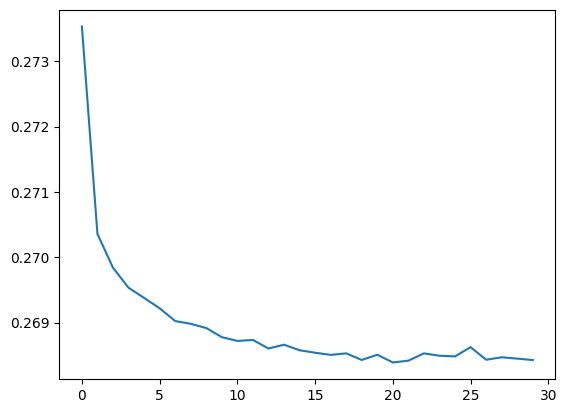

In [ ]:
plt.plot(history.history['loss'])

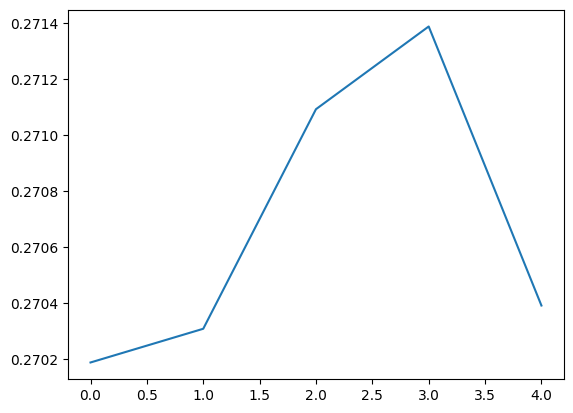

In [ ]:
plt.plot(history2.history['loss'])

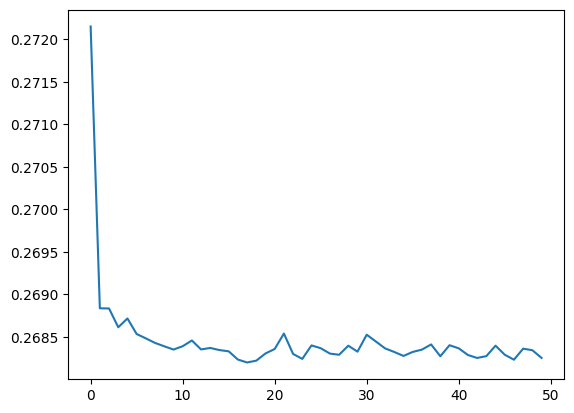

In [ ]:
plt.plot(history3.history['loss'])

In [ ]:
history2.history

{'loss': [0.2701883316040039,
  0.2703086733818054,
  0.2710924744606018,
  0.2713877558708191,
  0.2703916132450104],
 'accuracy': [0.001433317898772657,
  6.559807661687955e-05,
  0.002722320146858692,
  0.018761049956083298,
  0.0250125452876091],
 'precision_1': [0.45267489552497864,
  0.4183673560619354,
  0.41009464859962463,
  0.42907801270484924,
  0.41697415709495544],
 'recall_1': [0.002946296939626336,
  0.003294495865702629,
  0.0034819873981177807,
  0.003240926656872034,
  0.003026650520041585]}

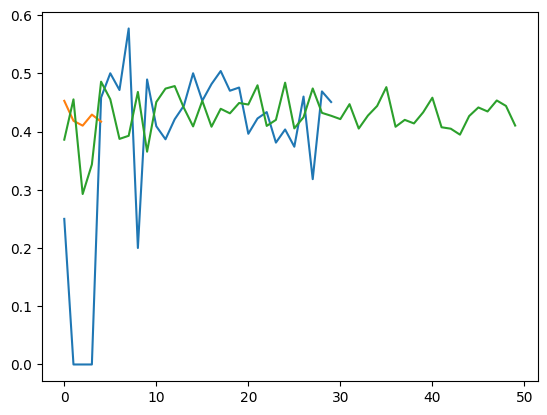

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history2.history['precision_1'])
plt.plot(history3.history['precision_2'])